In [1]:
import os
os.getcwd()

'C:\\Users\\pm_\\anaconda_files\\foxmula\\notebooks'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('OLS-01-Linear.csv', encoding = 'latin1')
df.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [4]:
df.shape

(205, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Comments        24 non-null     object 
dtypes: float64(6), object(7)
memory usage: 20.9+ KB


In [6]:
df.isnull().sum()      # gives-the-count-of-null-values

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [7]:
# dropping-comments-column
# as-it-has-181-NaN-values-out-of-205

data = df.drop(['Comments'], axis=1)

data.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No


In [8]:
data.describe()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,50.981512,127.591707,74.477561,81.975610,41.904390,37.871707
std,1.321205,4.128450,11.409816,10.111544,6.849476,4.835072
min,48.320000,112.200000,38.100000,50.300000,28.200000,27.100000
25%,50.650000,124.900000,68.900000,76.600000,38.400000,35.700000
50%,51.140000,127.400000,73.600000,81.400000,41.300000,37.600000
75%,51.630000,129.800000,79.900000,86.000000,44.400000,39.900000
max,60.320000,140.900000,107.700000,112.100000,82.300000,62.400000


In [9]:
data.isnull().sum()

Date               0
StartTime          0
DayOfWeek          0
GoingTo            0
Distance           0
MaxSpeed           0
AvgSpeed           0
AvgMovingSpeed     0
FuelEconomy       17
TotalTime          0
MovingTime         0
Take407All         0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
dtypes: float64(6), object(6)
memory usage: 19.3+ KB


In [11]:
data['FuelEconomy'].mode()

0     8.5
1    8.54
dtype: object

In [12]:
data['FuelEconomy'].value_counts()

8.5      20
8.54     20
8.75     11
7.97     10
8.45     10
8.33     10
8.37     10
8.32      8
8.48      8
9.35      8
9.53      8
8.89      8
9.08      8
9.76      7
8.31      6
7.89      6
9.3       6
8.97      6
10.05     4
8.93      4
8.28      3
9.16      3
-         2
7.81      2
Name: FuelEconomy, dtype: int64

In [13]:
data.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     188 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
dtypes: float64(6), object(6)
memory usage: 19.3+ KB


In [15]:
data.isnull().sum()

Date               0
StartTime          0
DayOfWeek          0
GoingTo            0
Distance           0
MaxSpeed           0
AvgSpeed           0
AvgMovingSpeed     0
FuelEconomy       17
TotalTime          0
MovingTime         0
Take407All         0
dtype: int64

In [16]:
# data['FuelEconomy'] = data['FuelEconomy'].fillna('8.5')
# data.isnull().sum()

data['FuelEconomy'] = data['FuelEconomy'].fillna('NA')
data.isnull().sum()

Date              0
StartTime         0
DayOfWeek         0
GoingTo           0
Distance          0
MaxSpeed          0
AvgSpeed          0
AvgMovingSpeed    0
FuelEconomy       0
TotalTime         0
MovingTime        0
Take407All        0
dtype: int64

In [17]:
data.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NA,39.3,36.3,No
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NA,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NA,37.5,35.9,No
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NA,39.8,35.6,No
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NA,36.8,34.8,No


In [18]:
data['FuelEconomy'].value_counts()

8.54     20
8.5      20
NA       17
8.75     11
7.97     10
8.45     10
8.33     10
8.37     10
9.35      8
8.32      8
8.48      8
9.53      8
8.89      8
9.08      8
9.76      7
8.31      6
7.89      6
9.3       6
8.97      6
10.05     4
8.93      4
8.28      3
9.16      3
-         2
7.81      2
Name: FuelEconomy, dtype: int64

In [19]:
data.isnull().sum()

Date              0
StartTime         0
DayOfWeek         0
GoingTo           0
Distance          0
MaxSpeed          0
AvgSpeed          0
AvgMovingSpeed    0
FuelEconomy       0
TotalTime         0
MovingTime        0
Take407All        0
dtype: int64

In [20]:
data.describe()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,50.981512,127.591707,74.477561,81.975610,41.904390,37.871707
std,1.321205,4.128450,11.409816,10.111544,6.849476,4.835072
min,48.320000,112.200000,38.100000,50.300000,28.200000,27.100000
25%,50.650000,124.900000,68.900000,76.600000,38.400000,35.700000
50%,51.140000,127.400000,73.600000,81.400000,41.300000,37.600000
75%,51.630000,129.800000,79.900000,86.000000,44.400000,39.900000
max,60.320000,140.900000,107.700000,112.100000,82.300000,62.400000


In [21]:
data.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NA,39.3,36.3,No
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NA,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NA,37.5,35.9,No
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NA,39.8,35.6,No
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NA,36.8,34.8,No


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     205 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
dtypes: float64(6), object(6)
memory usage: 19.3+ KB


In [23]:
data['Count'] = 1

In [24]:
a = data.groupby('GoingTo', as_index=False)['Count'].sum()
a

,GoingTo,Count
0,GSK,105
1,Home,100


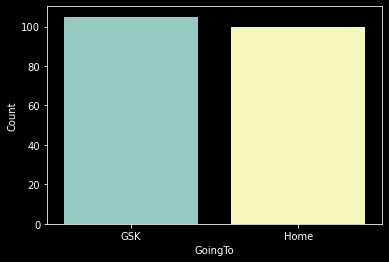

In [25]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

ax = sns.barplot(x = 'GoingTo', y = 'Count', data=a)
plt.show()

In [26]:
dow = data.groupby('DayOfWeek', as_index=False)['Count'].sum()
dow.sort_values('Count', ascending=False)

,DayOfWeek,Count
3,Tuesday,48
4,Wednesday,47
2,Thursday,44
1,Monday,39
0,Friday,27


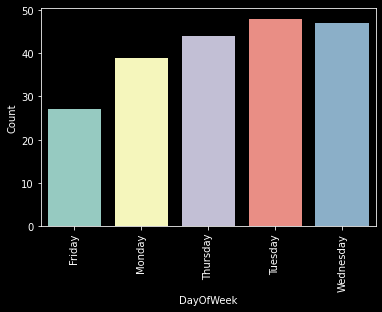

In [27]:
ax2 = sns.barplot(x = 'DayOfWeek', y = 'Count', data = dow)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

C:\Users\pm_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


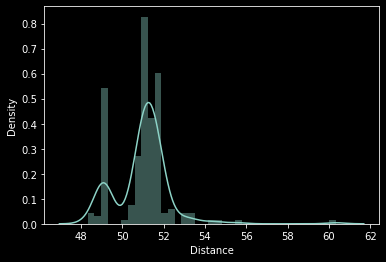

In [28]:
ax3 = sns.distplot(data['Distance'])

C:\Users\pm_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


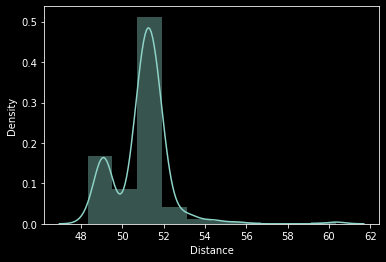

In [29]:
ax3 = sns.distplot(data['Distance'], bins=10)

C:\Users\pm_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


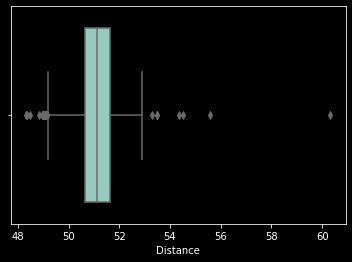

In [30]:
box = sns.boxplot(data['Distance'])

In [31]:
from scipy.stats import iqr

dq1 = data['Distance'].quantile(0.25)
dq3 = data['Distance'].quantile(0.75)
inter_dqr = iqr(data['Distance'])
print(dq1)
print(dq3)
print(inter_dqr)

50.65
51.63
0.980000000000004


In [32]:
import numpy as np
data['Outliers'] = 0
data['Outliers']= np.where(data['Distance']>(dq3 + 1.5*inter_dqr), 1, data['Outliers'])
data['Outliers']= np.where(data['Distance']<(dq1 - 1.5*inter_dqr), 1, data['Outliers'])
data.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Count,Outliers
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NA,39.3,36.3,No,1,0
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NA,37.9,34.9,No,1,0
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NA,37.5,35.9,No,1,0
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NA,39.8,35.6,No,1,1
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NA,36.8,34.8,No,1,0


C:\Users\pm_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


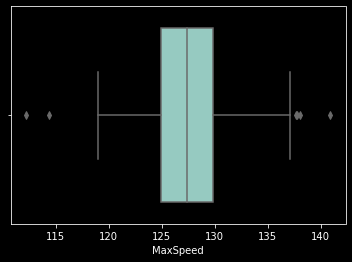

In [33]:
box2 = sns.boxplot(data['MaxSpeed'])

In [34]:
# mq1 = data['MaxSpeed'].quantile(0.25)
# mq3 = data['MaxSpeed'].quantile(0.75)
# inter_mqr = iqr(data['MaxSpeed'])
# print(mq1)
# print(mq3)
# print(inter_mqr)

In [35]:
# data['Outliers']= np.where(data['MaxSpeed']>(mq3 + 1.5*inter_mqr), 1, data['Outliers'])
# data['Outliers']= np.where(data['MaxSpeed']<(mq1 - 1.5*inter_mqr), 1, data['Outliers'])
# data.head()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     205 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Count           205 non-null    int64  
 13  Outliers        205 non-null    int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 22.5+ KB


C:\Users\pm_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


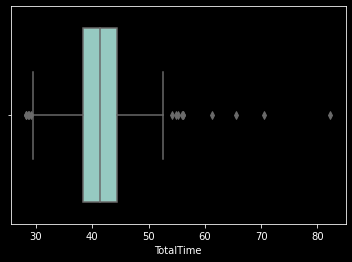

In [37]:
boxt = sns.boxplot(data['TotalTime'])

In [38]:
tq1 = data['TotalTime'].quantile(0.25)
tq3 = data['TotalTime'].quantile(0.75)
inter_tqr = iqr(data['TotalTime'])
print(tq1)
print(tq3)
print(inter_tqr)

38.4
44.4
6.0


In [39]:
data['Outliers']= np.where(data['TotalTime']>(tq3 + 1.5*inter_tqr), 1, data['Outliers'])
data['Outliers']= np.where(data['TotalTime']<(tq1 - 1.5*inter_tqr), 1, data['Outliers'])
data.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Count,Outliers
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NA,39.3,36.3,No,1,0
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NA,37.9,34.9,No,1,0
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NA,37.5,35.9,No,1,0
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NA,39.8,35.6,No,1,1
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NA,36.8,34.8,No,1,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   FuelEconomy     205 non-null    object 
 9   TotalTime       205 non-null    float64
 10  MovingTime      205 non-null    float64
 11  Take407All      205 non-null    object 
 12  Count           205 non-null    int64  
 13  Outliers        205 non-null    int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 22.5+ KB


In [41]:
data.Outliers.value_counts()

0    152
1     53
Name: Outliers, dtype: int64

In [42]:
data.MovingTime.describe()

count    205.000000
mean      37.871707
std        4.835072
min       27.100000
25%       35.700000
50%       37.600000
75%       39.900000
max       62.400000
Name: MovingTime, dtype: float64

In [43]:
data.AvgMovingSpeed.describe()

count    205.000000
mean      81.975610
std       10.111544
min       50.300000
25%       76.600000
50%       81.400000
75%       86.000000
max      112.100000
Name: AvgMovingSpeed, dtype: float64

In [44]:
data.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Count,Outliers
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NA,39.3,36.3,No,1,0
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NA,37.9,34.9,No,1,0
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NA,37.5,35.9,No,1,0
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NA,39.8,35.6,No,1,1
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NA,36.8,34.8,No,1,0


In [45]:
data['Take407All'].value_counts()

No     170
Yes     35
Name: Take407All, dtype: int64

In [46]:
data.isnull().sum()

Date              0
StartTime         0
DayOfWeek         0
GoingTo           0
Distance          0
MaxSpeed          0
AvgSpeed          0
AvgMovingSpeed    0
FuelEconomy       0
TotalTime         0
MovingTime        0
Take407All        0
Count             0
Outliers          0
dtype: int64

In [47]:
data['Outliers'].value_counts()

0    152
1     53
Name: Outliers, dtype: int64

In [48]:
dfclean = data[data['Outliers']==0]
print(df.shape)
print(dfclean.shape)

(205, 13)
(152, 14)


In [49]:
dfclean.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Count,Outliers
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NA,39.3,36.3,No,1,0
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NA,37.9,34.9,No,1,0
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NA,37.5,35.9,No,1,0
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NA,36.8,34.8,No,1,0
5,1/3/2012,07:57,Tuesday,GSK,51.80,135.8,84.5,88.8,NA,36.8,35.0,No,1,0


In [50]:
dfclean = dfclean.drop(columns=[('Take407All'), ('Count'), ('Outliers')])
dfclean.shape

(152, 11)

In [51]:
dfclean.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NA,39.3,36.3
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NA,37.9,34.9
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NA,37.5,35.9
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NA,36.8,34.8
5,1/3/2012,07:57,Tuesday,GSK,51.80,135.8,84.5,88.8,NA,36.8,35.0


In [52]:
data['FuelEconomy'].value_counts()

8.54     20
8.5      20
NA       17
8.75     11
7.97     10
8.45     10
8.33     10
8.37     10
9.35      8
8.32      8
8.48      8
9.53      8
8.89      8
9.08      8
9.76      7
8.31      6
7.89      6
9.3       6
8.97      6
10.05     4
8.93      4
8.28      3
9.16      3
-         2
7.81      2
Name: FuelEconomy, dtype: int64

In [53]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 204
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            152 non-null    object 
 1   StartTime       152 non-null    object 
 2   DayOfWeek       152 non-null    object 
 3   GoingTo         152 non-null    object 
 4   Distance        152 non-null    float64
 5   MaxSpeed        152 non-null    float64
 6   AvgSpeed        152 non-null    float64
 7   AvgMovingSpeed  152 non-null    float64
 8   FuelEconomy     152 non-null    object 
 9   TotalTime       152 non-null    float64
 10  MovingTime      152 non-null    float64
dtypes: float64(6), object(5)
memory usage: 14.2+ KB


In [54]:
dfclean = dfclean.drop(columns = [('Date'), ('StartTime')])
dfclean.head()

,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime
0,Friday,Home,51.29,127.4,78.3,84.8,NA,39.3,36.3
1,Friday,GSK,51.63,130.3,81.8,88.9,NA,37.9,34.9
2,Wednesday,Home,51.27,127.4,82.0,85.8,NA,37.5,35.9
4,Tuesday,Home,51.15,136.2,83.4,88.1,NA,36.8,34.8
5,Tuesday,GSK,51.80,135.8,84.5,88.8,NA,36.8,35.0


In [55]:
dfclean = dfclean.drop(columns = [('DayOfWeek'), ('GoingTo')])
dfclean.head()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime
0,51.29,127.4,78.3,84.8,NA,39.3,36.3
1,51.63,130.3,81.8,88.9,NA,37.9,34.9
2,51.27,127.4,82.0,85.8,NA,37.5,35.9
4,51.15,136.2,83.4,88.1,NA,36.8,34.8
5,51.80,135.8,84.5,88.8,NA,36.8,35.0


In [56]:
dfclean = dfclean.drop(columns = [('FuelEconomy')])
dfclean.head()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
0,51.29,127.4,78.3,84.8,39.3,36.3
1,51.63,130.3,81.8,88.9,37.9,34.9
2,51.27,127.4,82.0,85.8,37.5,35.9
4,51.15,136.2,83.4,88.1,36.8,34.8
5,51.80,135.8,84.5,88.8,36.8,35.0


In [57]:
x = dfclean.drop(columns='MaxSpeed')
y = dfclean['MaxSpeed']

print(x.shape)
print(y.shape)

(152, 5)
(152,)


In [58]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(121, 5)
(31, 5)
(121,)
(31,)


In [59]:
xtrain.head()

,Distance,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
118,51.69,70.4,70.1,44.1,39.7
18,51.06,80.5,84.9,38.1,36.1
34,51.55,74.2,83.7,41.7,36.9
117,51.23,71.7,76.9,42.9,40.0
79,51.75,72.1,82.0,43.1,37.8


In [60]:
ytrain.head()

118    128.7
18     126.9
34     129.6
117    127.2
79     127.4
Name: MaxSpeed, dtype: float64

In [61]:
import statsmodels.api as sm

model = sm.OLS(ytrain, xtrain.astype(float)).fit()

In [62]:
# model.intercept_

In [63]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               MaxSpeed   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.619e+04
Date:                Thu, 29 Apr 2021   Prob (F-statistic):                   2.85e-175
Time:                        12:35:36   Log-Likelihood:                         -333.42
No. Observations:                 121   AIC:                                      676.8
Df Residuals:                     116   BIC:                                      690.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [64]:
pred = model.predict(xtest)

data_p = list(zip(ytest, pred))

In [65]:
comptab = pd.DataFrame(data_p, columns=['Actual', 'Predicted'])
comptab.head()

,Actual,Predicted
0,124.6,128.419875
1,130.3,129.587169
2,127.0,128.011486
3,133.6,128.316451
4,129.8,126.514084


In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(ytest, pred))
print(rmse)

3.9809043654734038


In [67]:
# plt.figure(figsize=(5,5))
# plt.scatter(comptab['Actual'], comptab['Predicted'], c='crimson')
# plt.yscale('log')
# plt.xscale('log')

# p1 = max(max(comptab['Predicted']), max(comptab['Actual']))
# p2 = min(min(comptab['Predicted']), min(comptab['Actual']))
# plt.plot([p1, p2], [p1, p2], 'b-')
# plt.xlabel('True Values', fontsize=15)
# plt.ylabel('Predictions', fontsize=15)
# plt.axis('equal')
# plt.show()